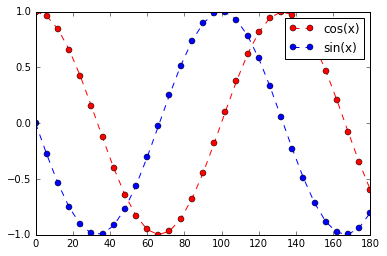

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
#for printing the plot within the jupyter notebook
#x=np.linspace(1,180,num=9)
x=np.arange(0,181,6) #for a range starting from 0 to 180 with 6 steps
#x=[0,30,45,60,90]
y1=np.cos(x)
y2=np.sin(x)
plt.plot(x,y1,'--ro',label= 'cos(x)')
plt.plot(x,y2,'--bo',label = 'sin(x)')
plt.legend()
plt.show()


[ 0 10 20 30 40 50 60 70 80 90] [-1.16799705 -0.17767539 -0.70180973  0.64606061  0.54215625 -0.42792979
  0.6976327  -1.94406151  0.29328032 -0.48919403]


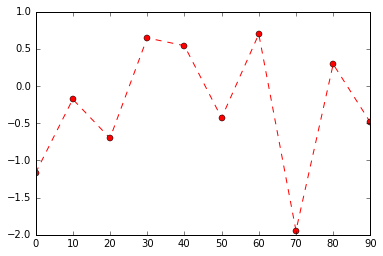

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

x=np.arange(0,100,10) #for a range starting from 0 to 180 with step size
y = np.random.normal(size = x.size)
print(x,y)
plt.plot(x,y,'--ro')
plt.show()

In [5]:
pwd

'C:\\Users\\Afaq\\Documents\\Python_Programs'

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import pandas as pd
df = pd.read_csv('china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


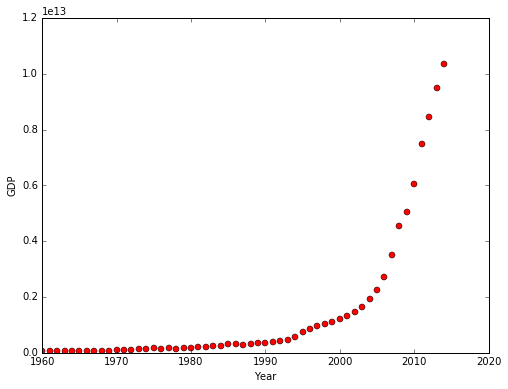

In [7]:
plt.figure(figsize=(8,6))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [11]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [8]:
def area(a,b):
     ar = a*b
     return ar

In [9]:
area(2,4)

8

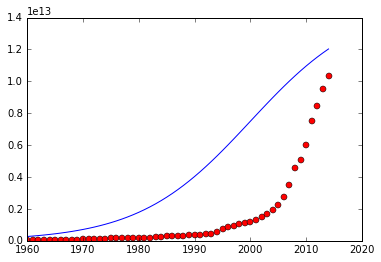

In [12]:
beta_1 = 0.10
beta_2 = 2000

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [13]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


 beta_1 = 690.451711, beta_2 = 0.997207


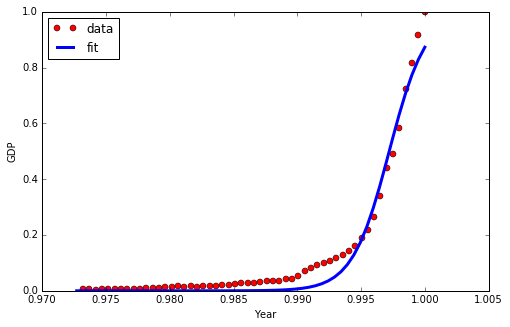

In [14]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [28]:
len(df)
print(np.random.rand(len(df)))
msk = np.random.rand(len(df)) < 0.5
print(msk)
print(xdata)
print(xdata[msk])
print(xdata[~msk])

[ 0.406835    0.76454173  0.31829133  0.92830332  0.49148364  0.98437108
  0.42406512  0.75318928  0.1267628   0.21676263  0.55664926  0.50591137
  0.99391454  0.32095719  0.87708969  0.69785543  0.18753964  0.05574295
  0.58643454  0.27355724  0.60157885  0.04875375  0.81728058  0.68005565
  0.4055117   0.69863602  0.94850383  0.91591799  0.73513945  0.34098992
  0.25092505  0.42346853  0.10215115  0.46902401  0.64333293  0.90402535
  0.29474553  0.98059235  0.42862716  0.76604559  0.49031911  0.94908019
  0.56524005  0.27672815  0.6475815   0.94075161  0.78950111  0.2904547
  0.42491452  0.30676618  0.62803706  0.41286553  0.83341154  0.94147478
  0.9340003 ]
[ True  True  True  True False False False  True  True False  True False
 False False  True False False  True False  True False  True False False
 False False False False  True False False  True False False False False
 False  True False False False False False  True  True False  True  True
  True  True False False False  True  

In [15]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.96
